In this notebook, we perform exploratory data analysis in preparation for tomorrow's k-means clustering.  The goal is to look for associations in floating-point data, which might represent clusters.

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

import os

os.chdir("/home/wln/Documents/python_programs/Astronomy_Datasets")
s = pd.read_csv("sloan_survey.csv")

This is where we import the libraries we need to perform the rest of our analyisis, as well as collecting our data from the Sloan survey csv file.

In [5]:
s.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Here we observe that we have 10 floating point columns, and seven integer columns.  5 of the floating point columns handle the spectral qualities of the image, and two handle right ascension and declination, respectively.  There is also a column for redshift and two for id values.  The integer columns relate to CCD information.

In [10]:
print(s['run'].unique())
print(len(s['run'].unique()))


[ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
23


There were 23 different imaging runs represented in this sample of 10000 objects

In [15]:
print(s['rerun'].unique())


[301]


Only one of the imaging runs was rerun.

In [17]:
print(s['camcol'].unique())

[4 2 1 5 6 3]


There were 6 different camera columns used.

In [19]:
print(s['field'].unique())
print(len(s['field'].unique()))

[267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 512 515 516 517 518 519 520 521 522 104 105
 110 111 112 113 114 115 116  25  26  28  29  90  91  92  93  95  74  70
  71  66 103 538 539 567 568 571 573 575 576 579 580 411 414 415 416 417
 418 420 421 422 424 425 426 427 428 430 431 432 435 437 438 439 440 442
 443 280 281 282 283 284 285 286 287 288 289 244 245 246 249 251 252 253
 254 255 256 257 258 259 260 261 262 263 314 315 316 318 319 320 321 322
 323 324 325 326 523 524 525 526 527 528 529 530 531 581 583 584 585 591
 607 608 167 169 536 540 563 569 570 577 588 590 598 602 606 205 446 197
 199 200 201 202 203 207 208 209 210 211 213 214 215 216 217 218 219 220
 290 291 292 221 222 223 224 225 226 227 444 445 448 451 452 453 454 455
 456 457 458 459 460 461 463 464 465 466 467 469 317 447 532 534 535 537
 544 559 560 561 562 564 565 566 572 574 587 533 54

There were 703 fields in this run.

<Axes: xlabel='ra', ylabel='redshift'>

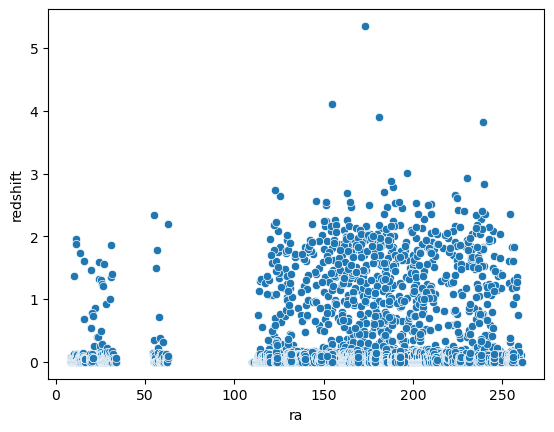

In [21]:
plt.figure()
sns.scatterplot(x='ra',y='redshift',data=s)

In this plot of right ascension vs. redshift, we see that there are very few objects with a redshift greater than three, and potential clusters may exist on this graph.

<Axes: xlabel='dec', ylabel='redshift'>

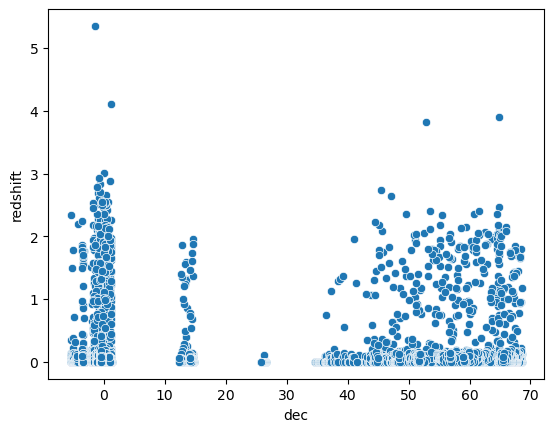

In [23]:
plt.figure()
sns.scatterplot(x='dec',y='redshift', data=s)

We see similar features in this plot of declination vs. redshift.

<Axes: xlabel='ra', ylabel='dec'>

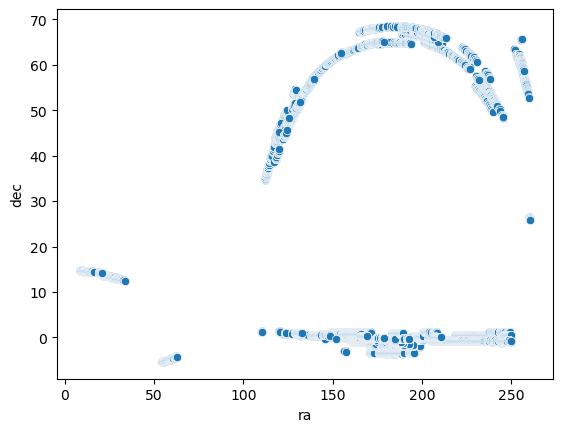

In [24]:
plt.figure()
sns.scatterplot(x='ra', y='dec', data=s)

This is a plot of declination vs right ascension.  There are two large clusters of objects, as can be seen in the left of the graph.

In this analysis, three clusters appear to exist in all three graphs.  Hence, a value of n_clusters = 3 will start tomorrow's k-means clustering.